In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('Data/full_data.csv')

In [3]:
term_info = pd.read_csv('Data/term_info.csv')
bill_info = pd.read_csv('Data/bill_info.csv')

In [4]:
data = pd.merge(data, term_info, how='left', on='pid')
data = pd.merge(data, bill_info, how='left', on='bid')

In [5]:
data.head()

,pid,bid,author_flag,co_author_flag,lead_author_flag,abstainVotes,ayeVotes,bdCount_comm,bdCount_no_comm,bdCount_all,...,wordCount,year,district,house_x,party,type,number,billState,status,house_y
0,1,CA_201520160AB1,0,0,0,1.0,0.0,0.0,0.0,0.0,...,0.0,2015,35,Senate,Democrat,AB,1,Chaptered,Chaptered,Assembly
1,2,CA_201520160AB1,0,0,0,0.0,2.0,0.0,0.0,0.0,...,0.0,2015,50,Assembly,Democrat,AB,1,Chaptered,Chaptered,Assembly
2,3,CA_201520160AB1,0,0,0,0.0,2.0,0.0,0.0,0.0,...,0.0,2015,14,Assembly,Democrat,AB,1,Chaptered,Chaptered,Assembly
3,4,CA_201520160AB1,0,0,0,0.0,2.0,0.0,0.0,0.0,...,0.0,2015,15,Assembly,Democrat,AB,1,Chaptered,Chaptered,Assembly
4,5,CA_201520160AB1,0,0,0,0.0,2.0,0.0,0.0,0.0,...,0.0,2015,35,Assembly,Republican,AB,1,Chaptered,Chaptered,Assembly


In [6]:
data.columns

Index(['pid', 'bid', 'author_flag', 'co_author_flag', 'lead_author_flag',
       'abstainVotes', 'ayeVotes', 'bdCount_comm', 'bdCount_no_comm',
       'bdCount_all', 'naeVotes', 'is_unanimous', 'utteranceDuration_all',
       'utteranceDuration_not_comm', 'utteranceDuration_comm', 'voteCount',
       'wordCount', 'year', 'district', 'house_x', 'party', 'type', 'number',
       'billState', 'status', 'house_y'],
      dtype='object')

## PCA

In [20]:
lb_pca = PCA(n_components=5)
party_pca = PCA(n_components=4)

### With unanimous bills

In [15]:
# This has bad explained variance, just remove this?
X_data = data.iloc[:, 2:17].copy(deep=True)
X_data = StandardScaler().fit_transform(X_data)

In [21]:
lb_pca.fit(X_data)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [22]:
lb_pca.explained_variance_ratio_

array([ 0.34124093,  0.13947622,  0.12554703,  0.08235593,  0.07154125])

In [23]:
np.sum(lb_pca.explained_variance_ratio_)

0.76016135295257259

In [8]:
pca_data = lb_pca.transform(X_data)

In [9]:
pca_data = pd.DataFrame(pca_data)

### Without Unianimous Bills

In [7]:
non_unan_data = data.loc[data['is_unanimous'] != 1, :].copy(deep=True).reset_index(drop=True)
non_unan_data = non_unan_data.iloc[:, 2:17]
non_unan_data['bid'] = data.loc[data['is_unanimous'] != 1, 'bid'].copy(deep=True).reset_index(drop=True)
non_unan_data['pid'] = data.loc[data['is_unanimous'] != 1, 'pid'].copy(deep=True).reset_index(drop=True)

In [8]:
non_unan_data.head()

,author_flag,co_author_flag,lead_author_flag,abstainVotes,ayeVotes,bdCount_comm,bdCount_no_comm,bdCount_all,naeVotes,is_unanimous,utteranceDuration_all,utteranceDuration_not_comm,utteranceDuration_comm,voteCount,wordCount,bid,pid
0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1,0.0,CA_201520160AB1005,1
1,0,0,0,0.0,3.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,3,0.0,CA_201520160AB1005,2
2,0,0,0,0.0,3.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,3,0.0,CA_201520160AB1005,3
3,0,0,0,0.0,2.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,2,0.0,CA_201520160AB1005,4
4,0,0,0,0.0,2.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,2,0.0,CA_201520160AB1005,5


In [9]:
non_unan = StandardScaler().fit_transform(non_unan_data.drop(['abstainVotes', 'pid','bid'], axis=1))

In [10]:
non_unan.shape

(215743, 14)

In [11]:
nu_pca = PCA(n_components=6)

In [12]:
nu_pca.fit(non_unan)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
nu_pca.explained_variance_ratio_

array([ 0.42093389,  0.14194494,  0.13298754,  0.08702854,  0.0771814 ,
        0.06972268])

In [14]:
np.sum(nu_pca.explained_variance_ratio_[:5])

0.8600763134959275

### With party info

In [16]:
# Also has bad explained variance
party_data = data.iloc[:,2:].copy(deep=True)
party_data['house'][party_data['house'] == 'Senate']  = 1
party_data['house'][party_data['house'] == 'Assembly']  = 0
party_data['party'][party_data['party'] == 'Democrat']  = 1
party_data['party'][party_data['party'] == 'Republican']  = 0

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.5/site-packages/ip

In [18]:
party_data = StandardScaler().fit_transform(party_data)

In [24]:
party_pca = PCA(n_components=4)

In [25]:
party_pca.fit(party_data)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
party_pca.explained_variance_ratio_

array([0.30213758, 0.13968214, 0.10130278, 0.08755041])

In [27]:
np.sum(party_pca.explained_variance_ratio_)

0.6306729106938551

## Factor Analysis

In [15]:
factors = pd.DataFrame(nu_pca.components_)

In [16]:
factors.columns = data.drop(['abstainVotes'], axis=1).columns[2:16]

In [17]:
factors

,author_flag,co_author_flag,lead_author_flag,ayeVotes,bdCount_comm,bdCount_no_comm,bdCount_all,naeVotes,is_unanimous,utteranceDuration_all,utteranceDuration_not_comm,utteranceDuration_comm,voteCount,wordCount
0,0.177127,0.043445,0.245774,0.078925,0.403145,0.017748,0.403350,0.005890,-0.000000e+00,0.416632,0.326631,0.341091,0.080168,0.414123
1,-0.432261,-0.457488,-0.093908,-0.540478,0.091632,-0.023271,0.091048,0.061143,5.421011e-20,0.094799,0.092285,0.062303,-0.502173,0.091601
2,-0.507654,-0.489087,-0.183943,0.434005,0.056723,-0.025593,0.056104,0.119565,1.084202e-19,0.029421,-0.047425,0.088477,0.498099,0.022934
3,-0.080571,-0.162102,0.093749,0.276356,-0.003201,0.012985,-0.002900,-0.907987,6.938894e-18,-0.001551,0.091766,-0.085739,-0.204125,0.000775
4,-0.013458,-0.081773,0.101359,-0.004663,-0.050385,0.975833,-0.027843,0.055005,-2.220446e-16,-0.007218,0.107874,-0.109493,0.023606,-0.003575
5,-0.088650,0.345790,-0.676654,-0.000633,0.144737,0.206506,0.149428,-0.175503,1.387779e-17,0.051589,-0.353369,0.402263,-0.089945,0.023447


In [18]:
loadings = nu_pca.components_.T * np.sqrt(nu_pca.explained_variance_)

In [19]:
loadings.T

array([[  4.14347901e-01,   1.01630020e-01,   5.74929643e-01,
          1.84626406e-01,   9.43063335e-01,   4.15173423e-02,
          9.43543280e-01,   1.37779432e-02,  -0.00000000e+00,
          9.74613410e-01,   7.64076768e-01,   7.97901913e-01,
          1.87533658e-01,   9.68744166e-01],
       [ -5.87190437e-01,  -6.21458924e-01,  -1.27566629e-01,
         -7.34193797e-01,   1.24473804e-01,  -3.16112830e-02,
          1.23681319e-01,   8.30573646e-02,   7.36398546e-20,
          1.28775774e-01,   1.25361211e-01,   8.46329889e-02,
         -6.82159715e-01,   1.24432238e-01],
       [ -6.67491326e-01,  -6.43078721e-01,  -2.41857893e-01,
          5.70653685e-01,   7.45826053e-02,  -3.36515574e-02,
          7.37683324e-02,   1.57210872e-01,   1.42556963e-19,
          3.86845749e-02,  -6.23564169e-02,   1.16334382e-01,
          6.54927778e-01,   3.01552984e-02],
       [ -8.57007984e-02,  -1.72422197e-01,   9.97166984e-02,
          2.93949691e-01,  -3.40524635e-03,   1.38119905e-0

In [24]:
loadings = pd.DataFrame(loadings.T)
loadings.columns = data.drop(['abstainVotes'], axis=1).columns[2:16]

In [28]:
loadings.drop(['is_unanimous'], axis=1).to_csv("loadings.csv")

## Build PCA Datasets

In [30]:
pca_data = pd.DataFrame(nu_pca.transform(non_unan))

In [31]:
pca_data.shape

(215743, 6)

In [32]:
pca_data['pid'] = non_unan_data['pid'].reset_index(drop=True)
pca_data['bid'] = non_unan_data['bid'].reset_index(drop=True)

In [33]:
pca_data.columns = ['one', 'two', 'three', 'four', 'five', 'six', 'pid', 'bid']

### One PC

In [144]:
one_pc = pca_data[['pid', 'bid', 'one']]

In [145]:
one_pid_bid_mat = pd.pivot_table(one_pc, index=['pid'], columns=['bid'])

In [146]:
one_bid_pid_mat = pd.pivot_table(one_pc, index=['bid'], columns=['pid'])

In [78]:
one_bid_pid_mat.to_csv("bill_leg_one.csv")

In [26]:
one_pid_bid_mat.to_csv("leg_bill_one.csv")

In [150]:
one_bid_pid_mat.shape

(1783, 121)

### Two PC

In [47]:
two_pc = pca_data[['pid', 'bid', 'one', 'two']]

In [48]:
two_pid_bid_mat = pd.pivot_table(two_pc, index=['pid'], columns=['bid'])

In [49]:
two_bid_pid_mat = pd.pivot_table(two_pc, index=['bid'], columns=['pid'])

In [25]:
two_bid_pid_mat.to_csv("bill_leg_two.csv")

In [26]:
two_pid_bid_mat.to_csv("leg_bill_two.csv")

### Three PC

In [22]:
three_pc = pca_data[['pid', 'bid', 'one', 'two', 'three']]

In [23]:
three_pid_bid_mat = pd.pivot_table(three_pc, index=['pid'], columns=['bid'])

In [24]:
three_bid_pid_mat = pd.pivot_table(three_pc, index=['bid'], columns=['pid'])

In [25]:
three_bid_pid_mat.to_csv("bill_leg_three.csv")

In [26]:
three_pid_bid_mat.to_csv("leg_bill_three.csv")

### Four PC

In [27]:
four_pc = pca_data[['pid', 'bid', 'one', 'two', 'three', 'four']]

In [23]:
four_pid_bid_mat = pd.pivot_table(four_pc, index=['pid'], columns=['bid'])

In [24]:
four_bid_pid_mat = pd.pivot_table(four_pc, index=['bid'], columns=['pid'])

In [25]:
four_bid_pid_mat.to_csv("bill_leg_four.csv")

In [26]:
four_pid_bid_mat.to_csv("leg_bill_four.csv")

### Five PC

In [34]:
five_pc = pca_data[['pid', 'bid', 'one', 'two', 'three', 'four', 'five']]

In [35]:
five_pid_bid_mat = pd.pivot_table(five_pc, index=['pid'], columns=['bid'])

In [36]:
five_bid_pid_mat = pd.pivot_table(five_pc, index=['bid'], columns=['pid'])

In [37]:
five_bid_pid_mat.to_csv("bill_leg_five.csv")

In [38]:
five_pid_bid_mat.to_csv("leg_bill_five.csv")

In [19]:
five_bid_pid_mat.shape

(1783, 605)

### Six PC

In [66]:
six_pc = pca_data[['pid', 'bid', 'one', 'two', 'three', 'four', 'five', 'six']]

In [67]:
six_pid_bid_mat = pd.pivot_table(six_pc, index=['pid'], columns=['bid'])

In [68]:
six_bid_pid_mat = pd.pivot_table(six_pc, index=['bid'], columns=['pid'])

In [69]:
six_bid_pid_mat.to_csv("bill_leg_six.csv")

In [26]:
six_pid_bid_mat.to_csv("leg_bill_six.csv")

In [105]:
six_bid_pid_mat.shape

(1783, 726)

## Clustering

In [39]:
import scipy.cluster
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
# Set cut points for agglomerative clustering 
bid_clusters = 15
pid_clusters = 5

#### Bill Clustering

In [41]:
bid_heirarch = scipy.cluster.hierarchy.linkage(five_bid_pid_mat, 'ward')

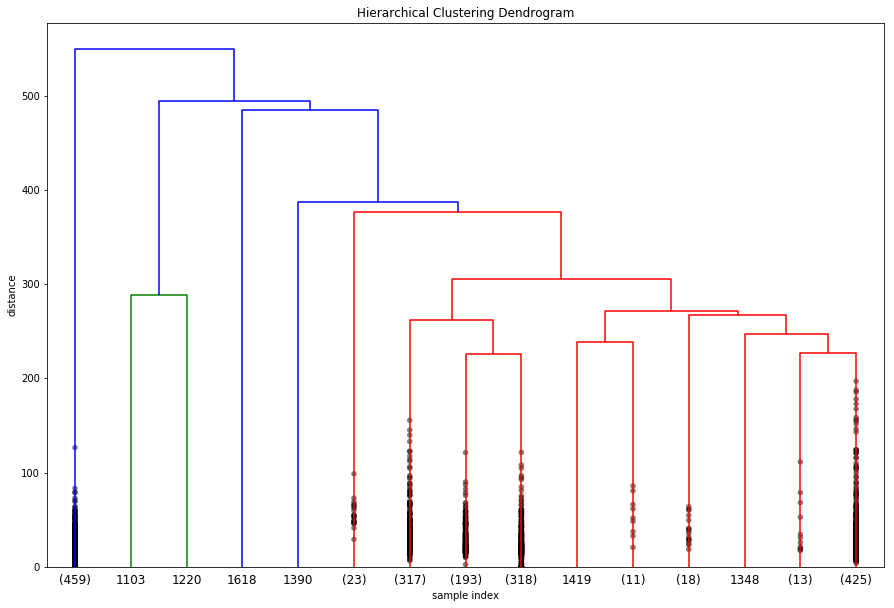

In [44]:
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
scipy.cluster.hierarchy.dendrogram(
    bid_heirarch,
    truncate_mode='lastp',
    p = bid_clusters,
    show_contracted=True
)
plt.show()

#### Legislator Clustering

In [42]:
pid_heirarch = scipy.cluster.hierarchy.linkage(five_pid_bid_mat, 'ward')

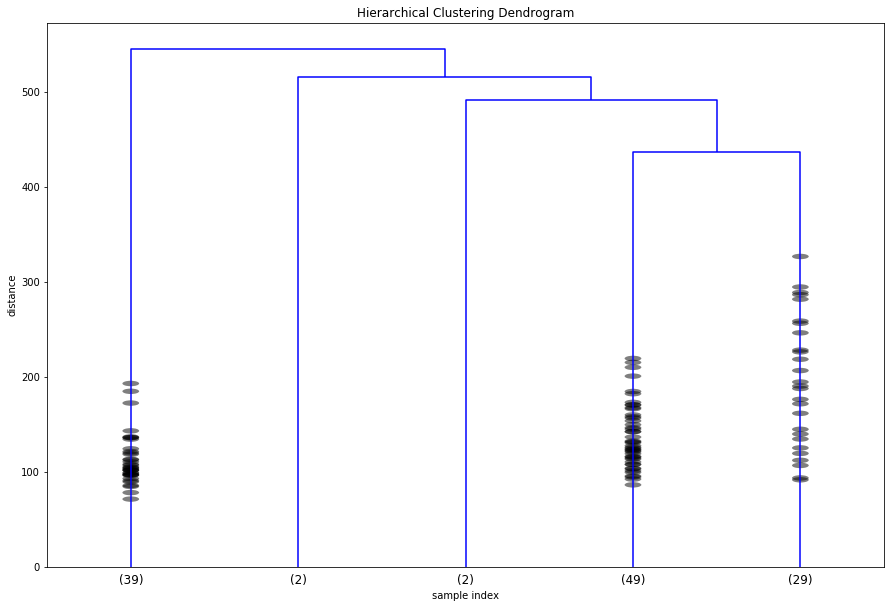

In [47]:
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
scipy.cluster.hierarchy.dendrogram(
    pid_heirarch,
    truncate_mode='lastp',
    p = pid_clusters,
    show_contracted=True
)
plt.show()

### Output Cluster Groupings

#### Bill Clusters

In [43]:
bid_cut_tree = scipy.cluster.hierarchy.cut_tree(bid_heirarch, bid_clusters)

In [44]:
bid_cluster_dict = {'cluster': bid_cut_tree.flatten(), 'bid': np.unique(data.loc[data['is_unanimous'] != 1, 'bid'])}

In [45]:
bill_cluster_df = pd.DataFrame(bid_cluster_dict)

In [46]:
bill_subj = pd.read_csv('Data/bill_subjects.csv')

In [47]:
bill_cluster_df = pd.merge(bill_cluster_df, bill_subj, on='bid', how='left')

In [48]:
bill_file_name = "bill_cluster_" + str(bid_clusters) + ".csv"
bill_cluster_df.to_csv(bill_file_name, index=False)

In [55]:
bill_cluster_df.head()

,bid,cluster,subject
0,CA_201520160AB1005,0,California Beverage Container Recycling and Li...
1,CA_201520160AB1006,1,Prisoners: mental health treatment.
2,CA_201520160AB101,2,Pupil instruction: ethnic studies.
3,CA_201520160AB1010,3,"Community colleges: part-time, temporary emplo..."
4,CA_201520160AB1014,3,Education finance: Safe Neighborhoods and Scho...


#### Legislator Clusters

In [49]:
pid_cut_tree = scipy.cluster.hierarchy.cut_tree(pid_heirarch, pid_clusters)

In [50]:
pid_cluster_dict = {'cluster': pid_cut_tree.flatten(), 'pid': np.unique(data.loc[data['is_unanimous'] != 1, 'pid'])}

In [51]:
legislator_cluster_df = pd.DataFrame(pid_cluster_dict)

In [52]:
leg_names = pd.read_csv('Data/leg_names.csv')
leg_names.columns = ['pid', 'name']
legislator_cluster_df = pd.merge(legislator_cluster_df, leg_names, on='pid', how='left')

In [53]:
legislator_cluster_df.head()

,cluster,pid,name
0,0,1,Isadore Hall
1,1,2,Richard Bloom
2,1,3,Susan Bonilla
3,1,4,Tony Thurmond
4,2,5,"K.H. ""Katcho"" Achadjian"


In [54]:
leg_file_name = "legislator_cluster_" + str(pid_clusters) + ".csv"
legislator_cluster_df.to_csv(leg_file_name, index=False)

### Run Subgroup Clustering

#### Legislators (Doesn't work, don't run this)

In [39]:
legislator_clusters.groupby(legislator_clusters['cluster'])['pid'].count()

cluster
0    36
1    79
2     2
3     2
4     2
Name: pid, dtype: int64

In [40]:
clust_zero = legislator_clusters.loc[legislator_clusters['cluster'] == 0, :]

In [41]:
subgroup_data = pd.merge(non_unan_data, clust_zero, how='inner', on='pid')

In [54]:
subgroup_loadings = StandardScaler().fit_transform(subgroup_data.iloc[:,:12])

In [55]:
subgroup_pca = nu_pca.fit_transform(subgroup_loadings)

In [56]:
subgroup_pca.shape

(64188, 5)

In [ ]:
zero_clusters = scipy.cluster.hierarchy.linkage(subgroup_data, 'ward')

## Produce Human Readable Output

### Bills

In [62]:
bill_cluster_df = pd.read_csv("bill_cluster_15.csv")

In [63]:
bill_cluster_df.head()

,bid,cluster,subject
0,CA_201520160AB1005,0,California Beverage Container Recycling and Li...
1,CA_201520160AB1006,1,Prisoners: mental health treatment.
2,CA_201520160AB101,0,Pupil instruction: ethnic studies.
3,CA_201520160AB1010,0,"Community colleges: part-time, temporary emplo..."
4,CA_201520160AB1014,0,Education finance: Safe Neighborhoods and Scho...


In [100]:
def output_bill_clusters(cluster_list, num_clusters):
    with open('readable_bill_clusters.txt', 'w') as f:
        for i in range(0, num_clusters):
            cluster_group = cluster_list.loc[cluster_list['cluster'] == i, :]
            print("Cluster " + str(i) + ' (Size ' + str(len(cluster_group)) + ')' + ":")
            f.write("Cluster " + str(i) + ' (Size ' + str(len(cluster_group)) + ')' + ":\n\n")
            if len(cluster_group) > 30:
                clust_sample = cluster_group.sample(n=20)
                print("Showing sample of 20 bills")
                f.write("Showing sample of 20 bills\n")
                for i in range(20):
                    print('BID:', clust_sample.iloc[i, 0], '    Subject:', clust_sample.iloc[i, 2])
                    f.write('BID:' + str(clust_sample.iloc[i, 0]) + '    Subject:' + str(clust_sample.iloc[i, 2]) + '\n')
            else:
                for i in range(len(cluster_group)):
                    print('BID:', cluster_group.iloc[i, 0], '    Subject:', cluster_group.iloc[i, 2])
                    f.write('BID:' + str(cluster_group.iloc[i, 0]) + '    Subject:' + str(cluster_group.iloc[i, 2]) + '\n')
            print("\n")
            f.write('\n\n')

In [101]:
output_bill_clusters(bill_cluster_df, bid_clusters)

Cluster 0 (Size 725):
Showing sample of 20 bills
BID: CA_201520160AB374     Subject: Health care coverage: prescription drugs.
BID: CA_201520160AB359     Subject: Grocery workers.
BID: CA_201520160AB679     Subject: Controlled substances.
BID: CA_201520160AB1110     Subject: Greenhouse gases emissions intensity reporting: retail electricity suppliers.
BID: CA_201520160AB2153     Subject: The Lead-Acid Battery Recycling Act of 2016.
BID: CA_201520160AB199     Subject: Alternative energy: recycled feedstock.
BID: CA_201520160AB1690     Subject: Community colleges: part-time, temporary employees.
BID: CA_201520160AB1995     Subject: Community colleges: homeless students: access to shower facilities.
BID: CA_201520160AB1461     Subject: Voter registration: California New Motor Voter Program.
BID: CA_201520160AB2892     Subject: Pesticide poisoning.
BID: CA_201520160AB2004     Subject: Hearing aids: minors.
BID: CA_201520160AJR4     Subject: Berryessa Snow Mountain National Monument.
BID: C

### Legislators 

In [85]:
leg_cluster_df = pd.read_csv("legislator_cluster_5.csv")

In [64]:
def output_legislator_clusters(cluster_list, num_clusters):
    with open('readable_legislator_clusters.txt', 'w') as f:
        for i in range(0, num_clusters):
            cluster_group = cluster_list.loc[cluster_list['cluster'] == i, :]
            print("Cluster " + str(i) + ' (Size ' + str(len(cluster_group)) + ')' + ":")
            print("")
            f.write("Cluster " + str(i) + ' (Size ' + str(len(cluster_group)) + ')' + ":\n\n")

            if len(cluster_group) > 30:
                clust_sample = cluster_group.sample(n=20)
                print("Showing sample of 20 legislators")
                f.write("Showing sample of 20 legislators\n")
                for i in range(20):
                    print('PID:', clust_sample.iloc[i, 1], '     Name:', clust_sample.iloc[i, 2])
                    f.write('PID: ' + str(clust_sample.iloc[i, 1]) + '     Name: ' + str(clust_sample.iloc[i, 2]) + '\n')
            else:
                for i in range(len(cluster_group)):
                    print('PID: ' + str(cluster_group.iloc[i, 1]) + '     Name:' + str(cluster_group.iloc[i, 2]))
                    f.write('PID: ' + str(cluster_group.iloc[i, 1]) + '     Name:' + str(cluster_group.iloc[i, 2]) + '\n')
            print("\n")
            f.write('\n\n')

In [65]:
output_legislator_clusters(legislator_cluster_df, pid_clusters)

Cluster 0 (Size 29):

PID: 1     Name:Isadore Hall
PID: 25     Name:Bill Monning
PID: 33     Name:Henry Perea
PID: 48     Name:Ben Hueso
PID: 52     Name:Tony Mendoza
PID: 55     Name:Bob Wieckowski
PID: 59     Name:Marty Block
PID: 61     Name:Anthony Cannella
PID: 62     Name:Connie Leyva
PID: 63     Name:Carol Liu
PID: 64     Name:Holly Mitchell
PID: 66     Name:Jerry Hill
PID: 70     Name:Benjamin Allen
PID: 92     Name:Jim Beall
PID: 93     Name:Mike McGuire
PID: 94     Name:Lois Wolk
PID: 95     Name:Cathleen Galgiani
PID: 96     Name:Richard Pan
PID: 98     Name:Loni Hancock
PID: 99     Name:Robert Hertzberg
PID: 100     Name:Hannah-Beth Jackson
PID: 102     Name:Kevin De Leon
PID: 103     Name:Ed Hernandez
PID: 104     Name:Fran Pavley
PID: 106     Name:Richard Roth
PID: 107     Name:Ricardo Lara
PID: 4656     Name:Sharon Runner
PID: 10481     Name:Steve Glazer
PID: 17377     Name:Joaquin Arambula


Cluster 1 (Size 49):

Showing sample of 20 legislators
PID: 21      Name: Jim C

## Graphs

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

### Non-Unanimous

In [46]:
nu_data = data.loc[data['is_unanimous'] != 1, :].copy()

In [47]:
nu_data['party_col'] = 'g'
nu_data.loc[nu_data['party'] == 'Democrat', 'party_col'] = 'b'
nu_data.loc[nu_data['party'] == 'Republican', 'party_col'] = 'r'

In [49]:
nu_pca_data = pd.DataFrame(nu_pca.transform(non_unan))

In [54]:
nu_data['house_col'] = 'g'
nu_data.loc[data['house']=='Senate','house_col'] = 'r'

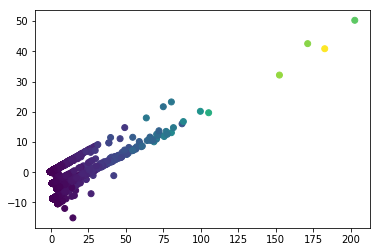

In [78]:
plt.scatter(nu_pca_data.iloc[:,0], nu_pca_data.iloc[:,1], c=nu_data['wordCount'])
plt.show()

/opt/conda/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning:

matplotlib is currently using a non-GUI backend, so cannot show the figure



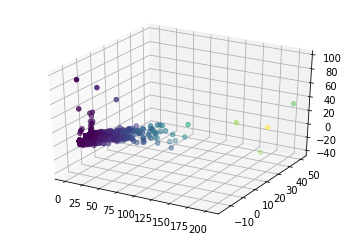

In [80]:
scatter_plt = plt.figure()

ax = scatter_plt.add_subplot(111, projection='3d')

ax.scatter(nu_pca_data.iloc[:,0], nu_pca_data.iloc[:,1], nu_pca_data.iloc[:,2], c=nu_data['wordCount'])
scatter_plt.show()